In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("airline_passenger_satisfaction.csv")
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

# Ratings

In [4]:
df.iloc[:, 9:23].describe()

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Flight data and passengers data

In [5]:
df.iloc[:, 1:9].describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


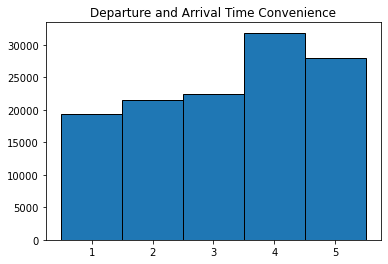

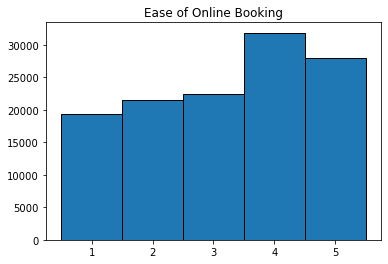

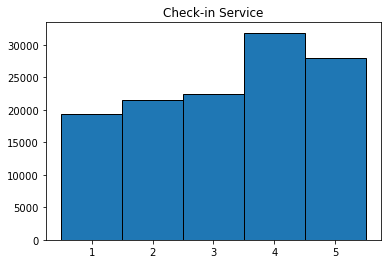

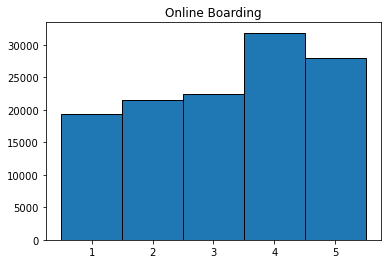

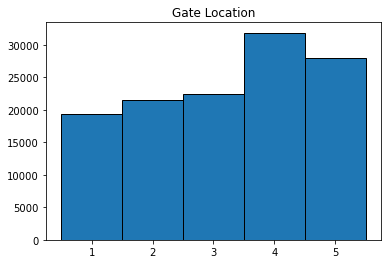

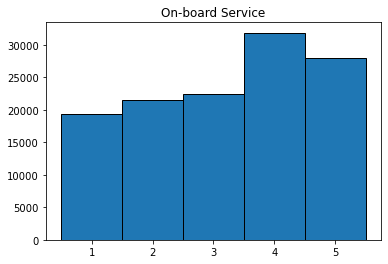

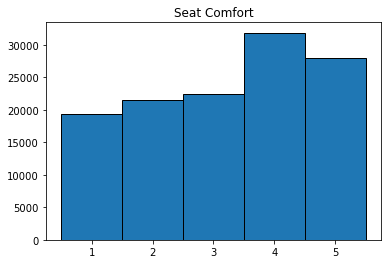

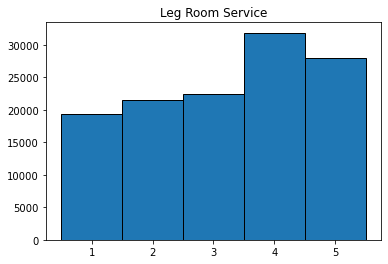

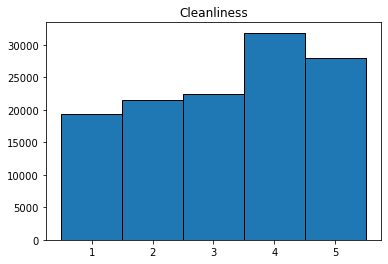

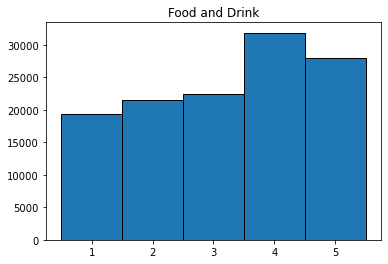

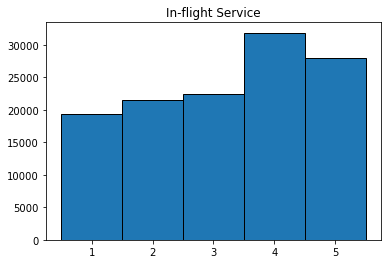

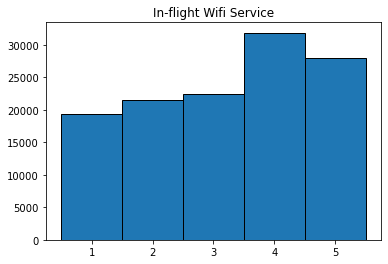

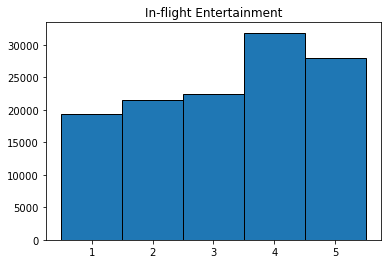

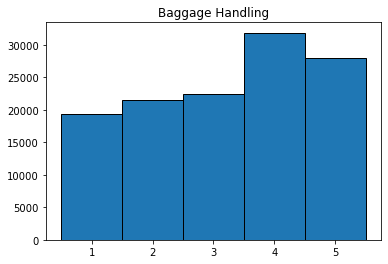

In [6]:
bin_edges = np.arange(0.5, 6, 1)
for i in range(9,23):
    plt.hist(df.iloc[:, 9], bins=bin_edges, edgecolor='black')
    plt.title(df.columns[i])
    plt.show()

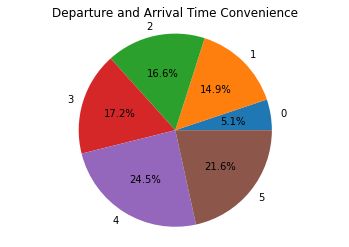

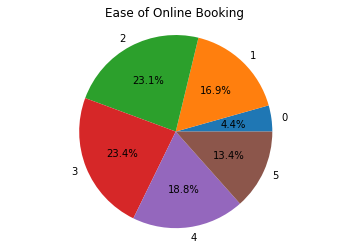

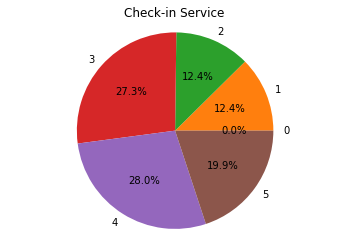

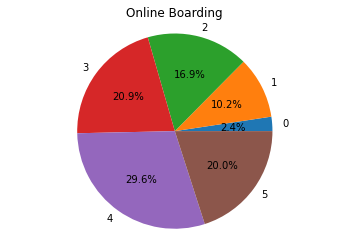

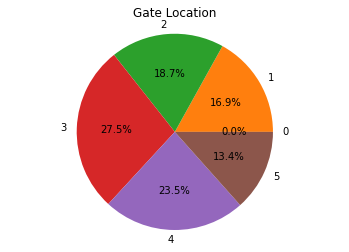

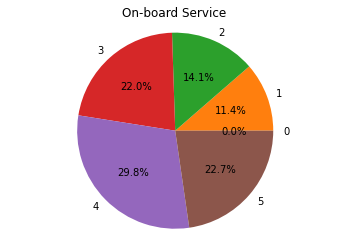

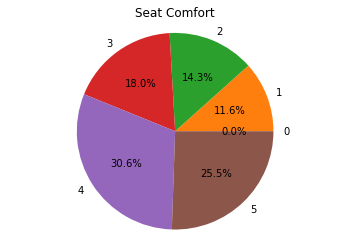

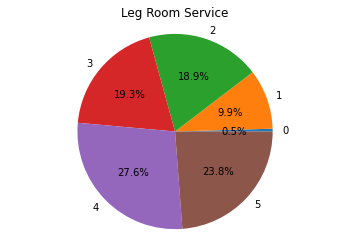

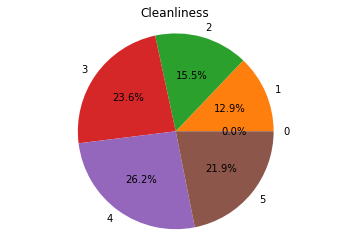

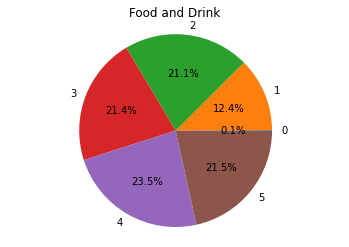

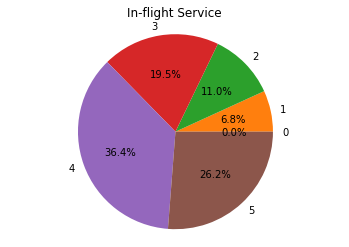

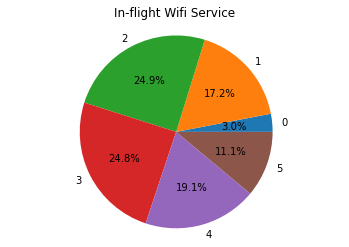

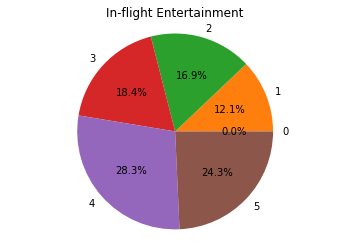

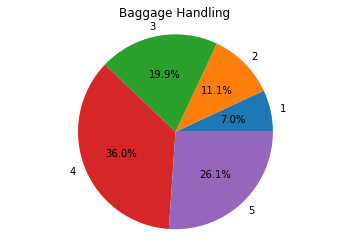

In [7]:
for col in range(9,23):
    labels = np.arange(0,6)
    dfUnique = df[df.columns[col]].unique()
    labels = list(dfUnique)
    labels = sorted(labels)
    dfGrouped = df.groupby([df.columns[col]]).count()
    dfGrouped = dfGrouped.iloc[:, 0]
    sizes = list(dfGrouped)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax1.axis('equal')
    plt.title(df.columns[col])
    plt.show()

<AxesSubplot:xlabel='Gender'>

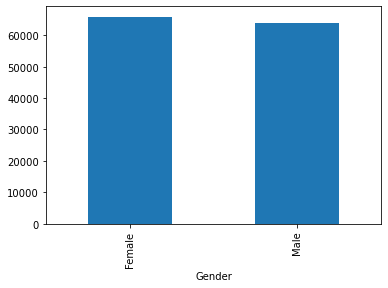

In [8]:
df.groupby(["Gender"]).count().plot.bar(y="ID", legend =False)

<AxesSubplot:xlabel='Class'>

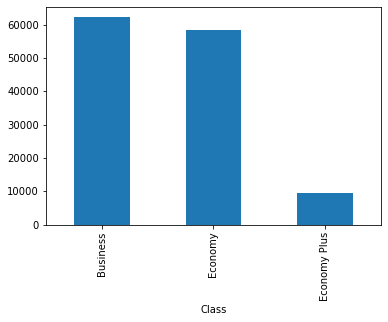

In [9]:
df.groupby(["Class"]).count().plot.bar(y="ID", legend =False)

<AxesSubplot:xlabel='Type of Travel'>

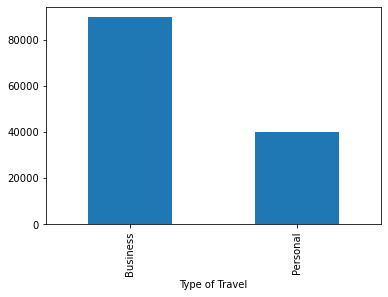

In [10]:
df.groupby(["Type of Travel"]).count().plot.bar(y="ID", legend =False)

<AxesSubplot:xlabel='Customer Type'>

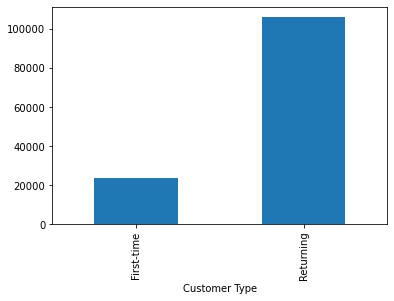

In [11]:
df.groupby(["Customer Type"]).count().plot.bar(y="ID", legend =False)

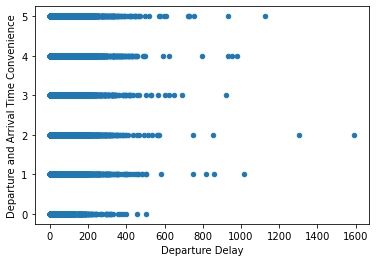

In [12]:
df.plot.scatter(x="Departure Delay", y="Departure and Arrival Time Convenience");

<AxesSubplot:xlabel='Departure Delay', ylabel='Arrival Delay'>

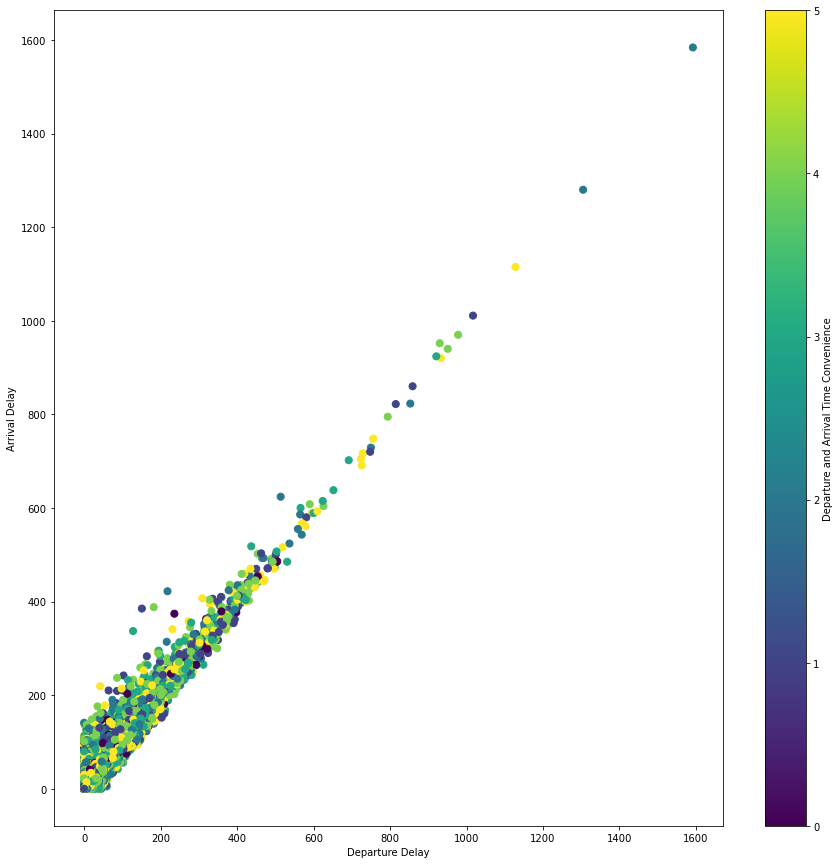

In [13]:
fig, ax = plt.subplots()
df.plot.scatter(x="Departure Delay", y="Arrival Delay" ,c="Departure and Arrival Time Convenience",  cmap="viridis", figsize=(15,15), s=50, ax=ax)

<AxesSubplot:xlabel='Seat Comfort', ylabel='Flight Distance'>

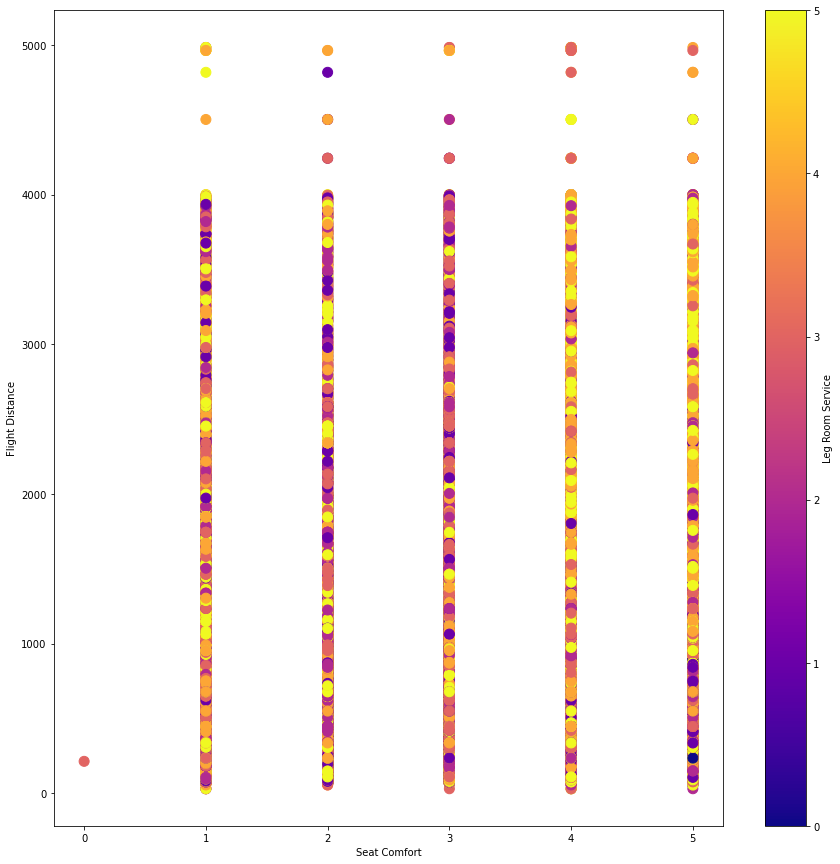

In [14]:
fig, ax = plt.subplots()
df.plot.scatter(y="Flight Distance", c="Leg Room Service", x="Seat Comfort", cmap="plasma", figsize=(15,15), s=100, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Seat Comfort'>

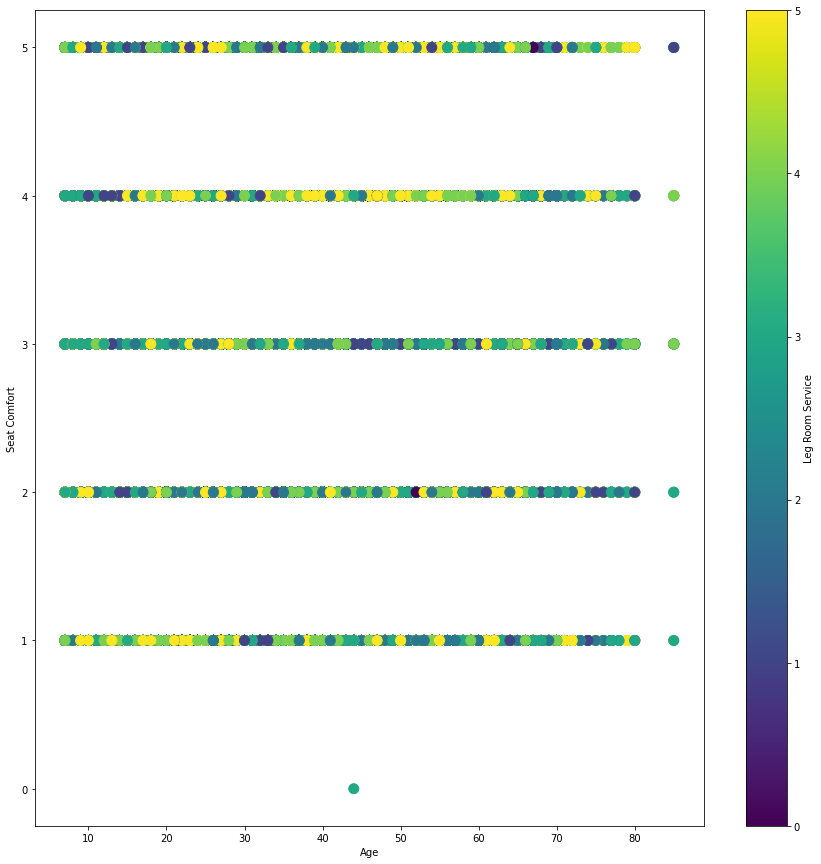

In [15]:
fig, ax = plt.subplots()
df.plot.scatter(x="Age", c="Leg Room Service", y="Seat Comfort", cmap="viridis", figsize=(15,15), s=100, ax=ax)

<AxesSubplot:xlabel='Departure Delay', ylabel='Age'>

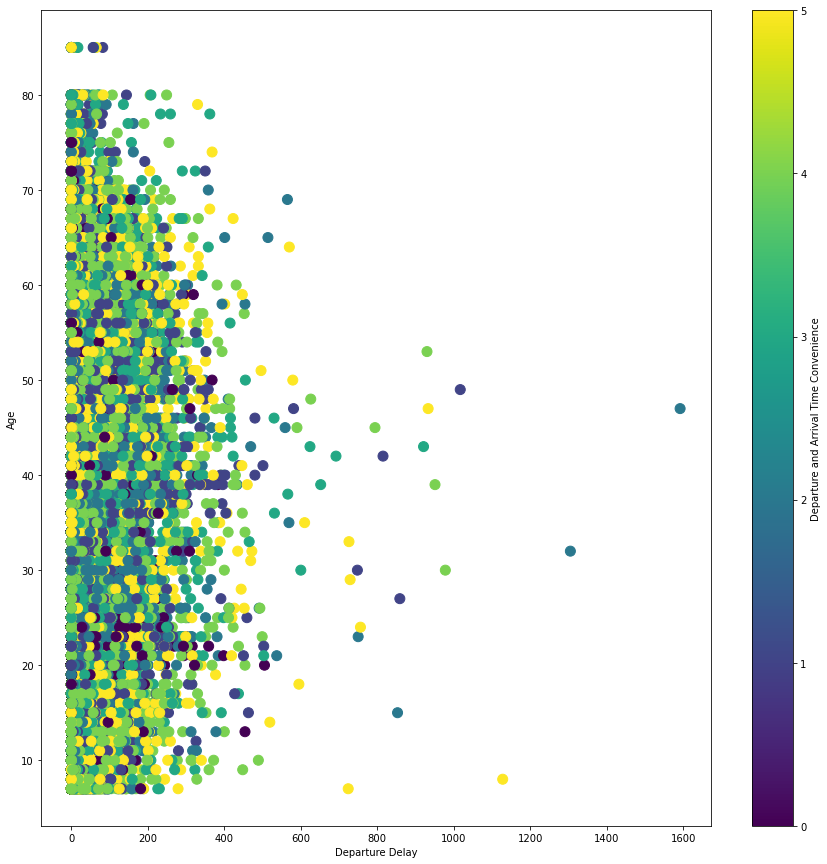

In [16]:
fig, ax = plt.subplots()
df.plot.scatter(y="Age", c="Departure and Arrival Time Convenience", x="Departure Delay", cmap="viridis", figsize=(15,15), s=100, ax=ax)

<AxesSubplot:xlabel='Arrival Delay', ylabel='Age'>

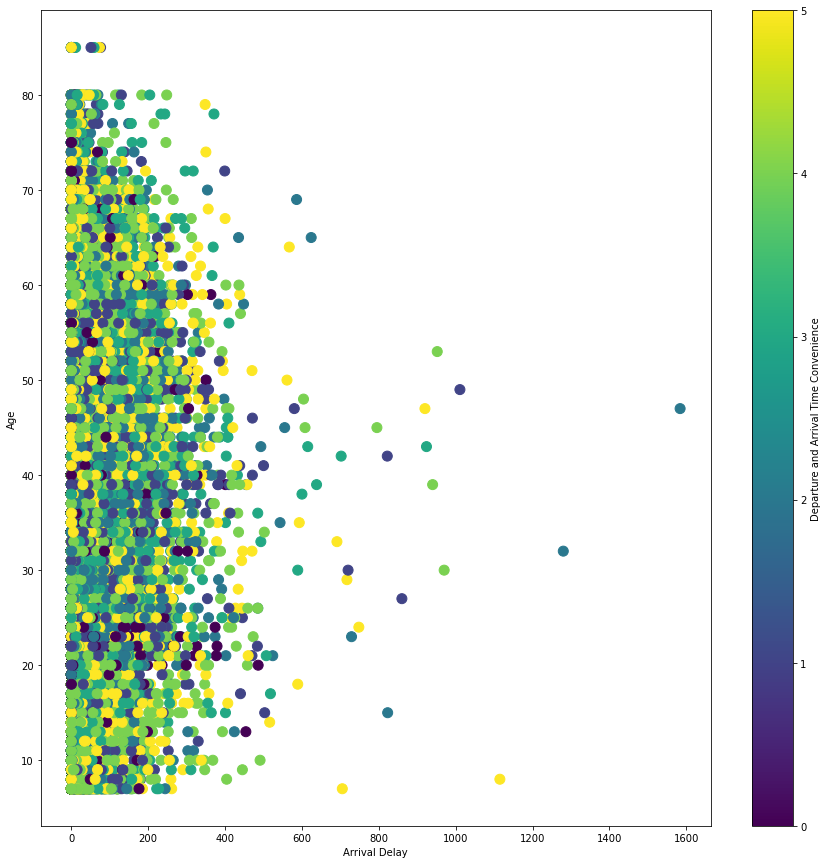

In [17]:
fig, ax = plt.subplots()
df.plot.scatter(y="Age", c="Departure and Arrival Time Convenience", x="Arrival Delay", cmap="viridis", figsize=(15,15), s=100, ax=ax)

# Categorial variable satisfaction based on ratings

In [18]:
df.iloc[:, 9:24].groupby("Satisfaction").mean()

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Satisfaction,,,,,,,,,,,,,,
Neutral or Dissatisfied,3.130221,2.549393,3.042967,2.658621,2.980055,3.019537,3.037998,2.990443,2.932800,2.958422,3.389601,2.398423,2.892433,3.374912
Satisfied,2.963068,3.026955,3.649004,4.025856,2.972850,3.856171,3.966417,3.820054,3.746509,3.525448,3.970990,3.158609,3.964202,3.966914


In [19]:
dfratings = df.iloc[:, 9:24]
agg = {}
for column in dfratings.iloc[:, 0:14].columns:
    agg[column] = [np.mean, np.median, np.std, stats.mode]

pd.pivot_table(dfratings, values=dfratings.columns, index=['Satisfaction'], aggfunc=agg).T

Satisfaction                                  Neutral or Dissatisfied  \
Baggage Handling                       mean                  3.374912   
                                       median                     4.0   
                                       mode            ([4], [24286])   
                                       std                   1.175043   
Check-in Service                       mean                  3.042967   
                                       median                     3.0   
                                       mode            ([4], [19619])   
                                       std                   1.282169   
Cleanliness                            mean                    2.9328   
                                       median                     3.0   
                                       mode            ([3], [17370])   
                                       std                   1.326273   
Departure and Arrival Time Convenience mean                  3.130221   
                                       median                     3.0   
                                       mode            ([4], [19491])   
                                       std                   1.500602   
Ease of Online Booking                 mean                  2.549393   
                                       median                     3.0   
                                       mode            ([3], [20968])   
                                       std                   1.209112   
Food and Drink                         mean                  2.958422   
                                       median                     3.0   
                                       mode            ([3], [16748])   
                                       std                   1.347681   
Gate Location                          mean                  2.980055   
                                       median                     3.0   
                                       mode            ([3], [23321])   
                                       std                    1.19973   
In-flight Entertainment                mean                  2.892433   
                                       median                     3.0   
                                       mode            ([3], [17360])   
                                       std                   1.324212   
In-flight Service                      mean                  3.389601   
                                       median                     4.0   
                                       mode            ([4], [24691])   
                                       std                   1.176514   
In-flight Wifi Service                 mean                  2.398423   
                                       median                     2.0   
                                       mode            ([2], [24330])   
                                       std                    0.96425   
Leg Room Service                       mean                  2.990443   
                                       median                     3.0   
                                       mode            ([3], [18139])   
                                       std                   1.304366   
On-board Service                       mean                  3.019537   
                                       median                     3.0   
                                       mode            ([3], [19463])   
                                       std                   1.283096   
Online Boarding                        mean                  2.658621   
                                       median                     3.0   
                                       mode            ([3], [23385])   
                                       std                   1.147048   
Seat Comfort                           mean                  3.037998   
                                       median             

In [23]:
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 100
    display.max_rows = 200
    display.max_colwidth = 199
    display.width = 1000
    display.precision = 2

set_pandas_display_options()

In [24]:
df.iloc[:, 9:24].groupby("Satisfaction").describe().T

Satisfaction                                  Neutral or Dissatisfied  Satisfied
Departure and Arrival Time Convenience count                 73452.00   56428.00
                                       mean                      3.13       2.96
                                       std                       1.50       1.56
                                       min                       0.00       0.00
                                       25%                       2.00       2.00
                                       50%                       3.00       3.00
                                       75%                       4.00       4.00
                                       max                       5.00       5.00
Ease of Online Booking                 count                 73452.00   56428.00
                                       mean                      2.55       3.03
                                       std                       1.21       1.58
                                       min                       0.00       0.00
                                       25%                       2.00       2.00
                                       50%                       3.00       3.00
                                       75%                       3.00       4.00
                                       max                       5.00       5.00
Check-in Service                       count                 73452.00   56428.00
                                       mean                      3.04       3.65
                                       std                       1.28       1.16
                                       min                       0.00       1.00
                                       25%                       2.00       3.00
                                       50%                       3.00       4.00
                                       75%                       4.00       5.00
                                       max                       5.00       5.00
Online Boarding                        count                 73452.00   56428.00
                                       mean                      2.66       4.03
                                       std                       1.15       1.20
                                       min                       0.00       0.00
                                       25%                       2.00       4.00
                                       50%                       3.00       4.00
                                       75%                       3.00       5.00
                                       max                       5.00       5.00
Gate Location                          count                 73452.00   56428.00
                                       mean                      2.98       2.97
                                       std                       1.20       1.37
                                       min                       1.00       0.00
                                       25%                       2.00       2.00
                                       50%                       3.00       3.00
                                       75%                       4.00       4.00
                                       max                       5.00       5.00
On-board Service                       count                 73452.00   56428.00
                                       mean                      3.02       3.86
                                       std                       1.28       1.13
                                       min                       0.00       1.00
                                       25%                       2.00       3.00
                                       50%                       3.00       4.00
                                       75%                       4.00       5.00
                                       max                       5.00       5.00
Seat Comfort                   

In [21]:
df.iloc[:, 9:24].groupby("Satisfaction").describe().T.to_excel("Statystyka.xlsx")

In [22]:
#https://pandas.pydata.org/docs/user_guide/visualization.html

In [59]:
#https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
#https://julienbeaulieu.gitbook.io/wiki/sciences/programming/data-analysis/data-visualization/univariate-exploration-of-data/choosing-a-plot-for-discrete-data